In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("Fraud dataset.csv")

In [4]:
df.head()

,step,type,amount,nameorig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameorig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameorig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameorig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.shape[0]

6362620

In [11]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

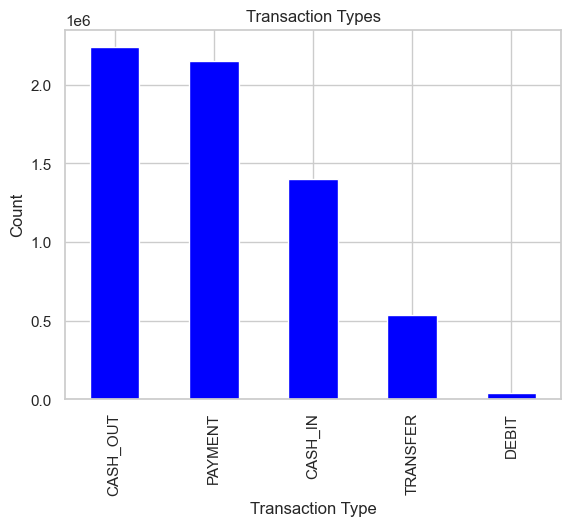

In [12]:
df["type"].value_counts().plot(kind="bar", title="Transaction Types", color="blue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

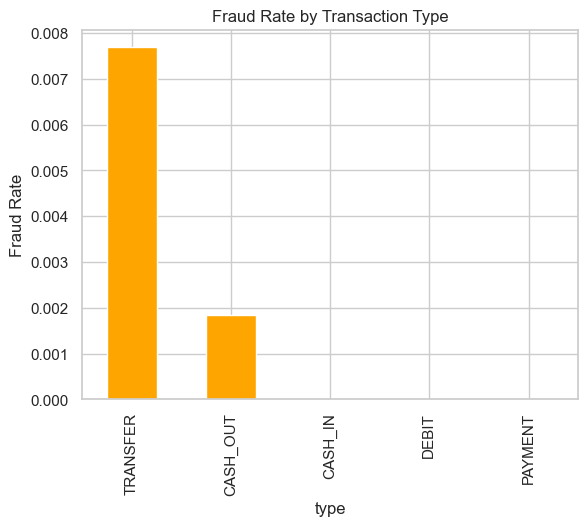

In [13]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Transaction Type", color="orange")
plt.ylabel("Fraud Rate")
plt.show()

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

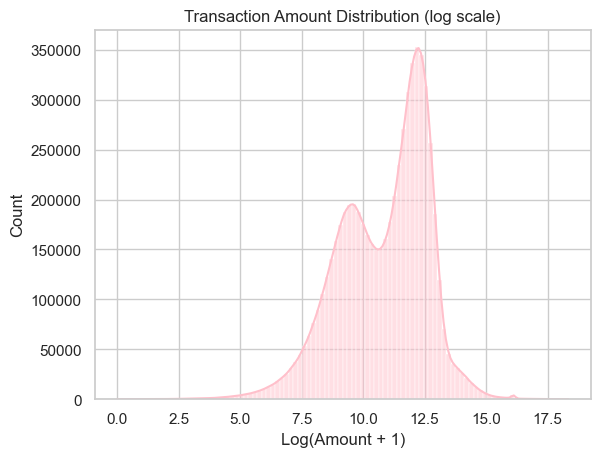

In [15]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="Pink")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

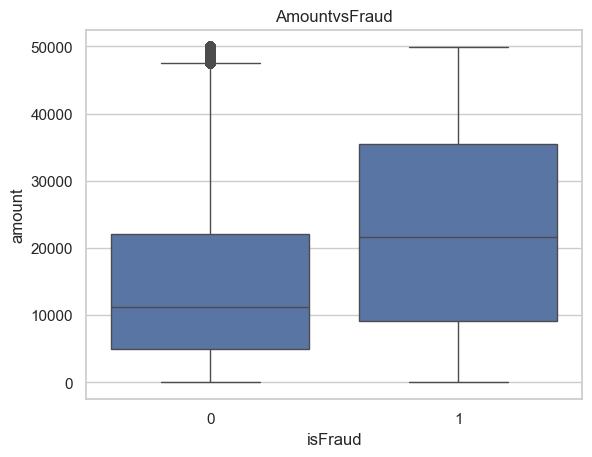

In [16]:
sns.boxplot(data=df[df["amount"] < 50000], x="isFraud", y="amount")
plt.title("AmountvsFraud")
plt.show()

In [17]:
df["originalbalancediff"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["destinationbalancediff"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [18]:
(df["originalbalancediff"] < 0).sum()

np.int64(1399253)

In [19]:
(df["destinationbalancediff"] < 0).sum()

np.int64(1238864)

In [20]:
df.head(2)

,step,type,amount,nameorig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,originalbalancediff,destinationbalancediff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


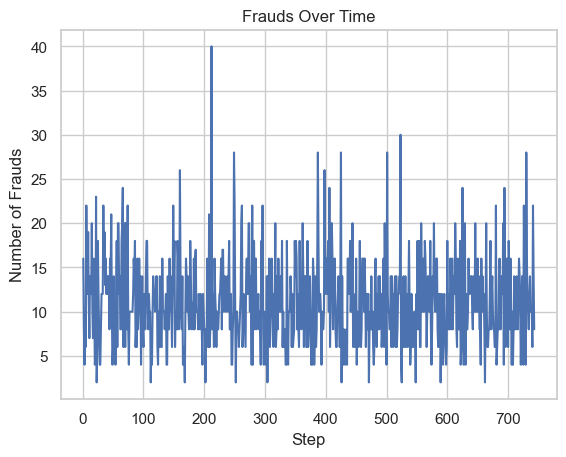

In [21]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per step")
plt.xlabel("Step")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [22]:
df.drop(columns="step", inplace=True)

In [23]:
df.head()

,type,amount,nameorig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,originalbalancediff,destinationbalancediff
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0
